# Assignment 1
## COMP-3704 (241552) Neural Networks and Deep Learning

### Brandon, Santiago

In [1]:
# Importing libraries
import tensorflow as tf
import pandas as pd
import seaborn as sb
import matplotlib as plt
from pprint import pprint as pp

from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error

In [4]:
# Reading data
data = pd.read_csv('F:/RRC v2/Semester 3/Comp-3704/Assignment 1/Concrete_Data_Yeh.csv')
data.head()

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30

## An observation that we made was that freshly poured concrete has no slag and has the highest csMPa. While older Concrete has slag, lower Coarseaggregate and a much lower csMPa. Another observation was that Fineaggregate gradually lowewrs with age but then the final one has a really high fineaggregate  

In [5]:
# Displaying info
dupe = pd.DataFrame.info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
# Checking for duplicates
dupe = pd.DataFrame.duplicated(data)
num_dupe = dupe.sum()
print("duplicates:", num_dupe)

data.drop_duplicates(inplace=True)

duplicates: 25


## There appeared to be no missing values but there was duplicates so we dropped them from the dataframe

<AxesSubplot: >

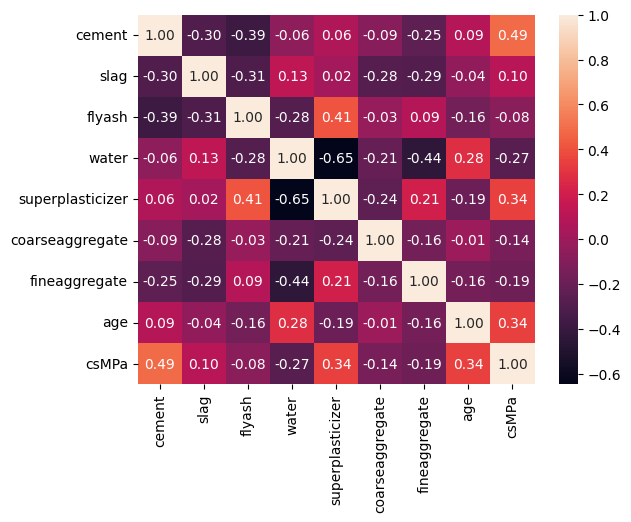

In [7]:
# Creating data corralation
matrix = data.corr()

# Creating heatmap
sb.heatmap(matrix, annot =True, fmt='.2f')

c:\Users\Santi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Santi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Santi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Santi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

c:\Users\Santi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Santi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Santi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Santi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

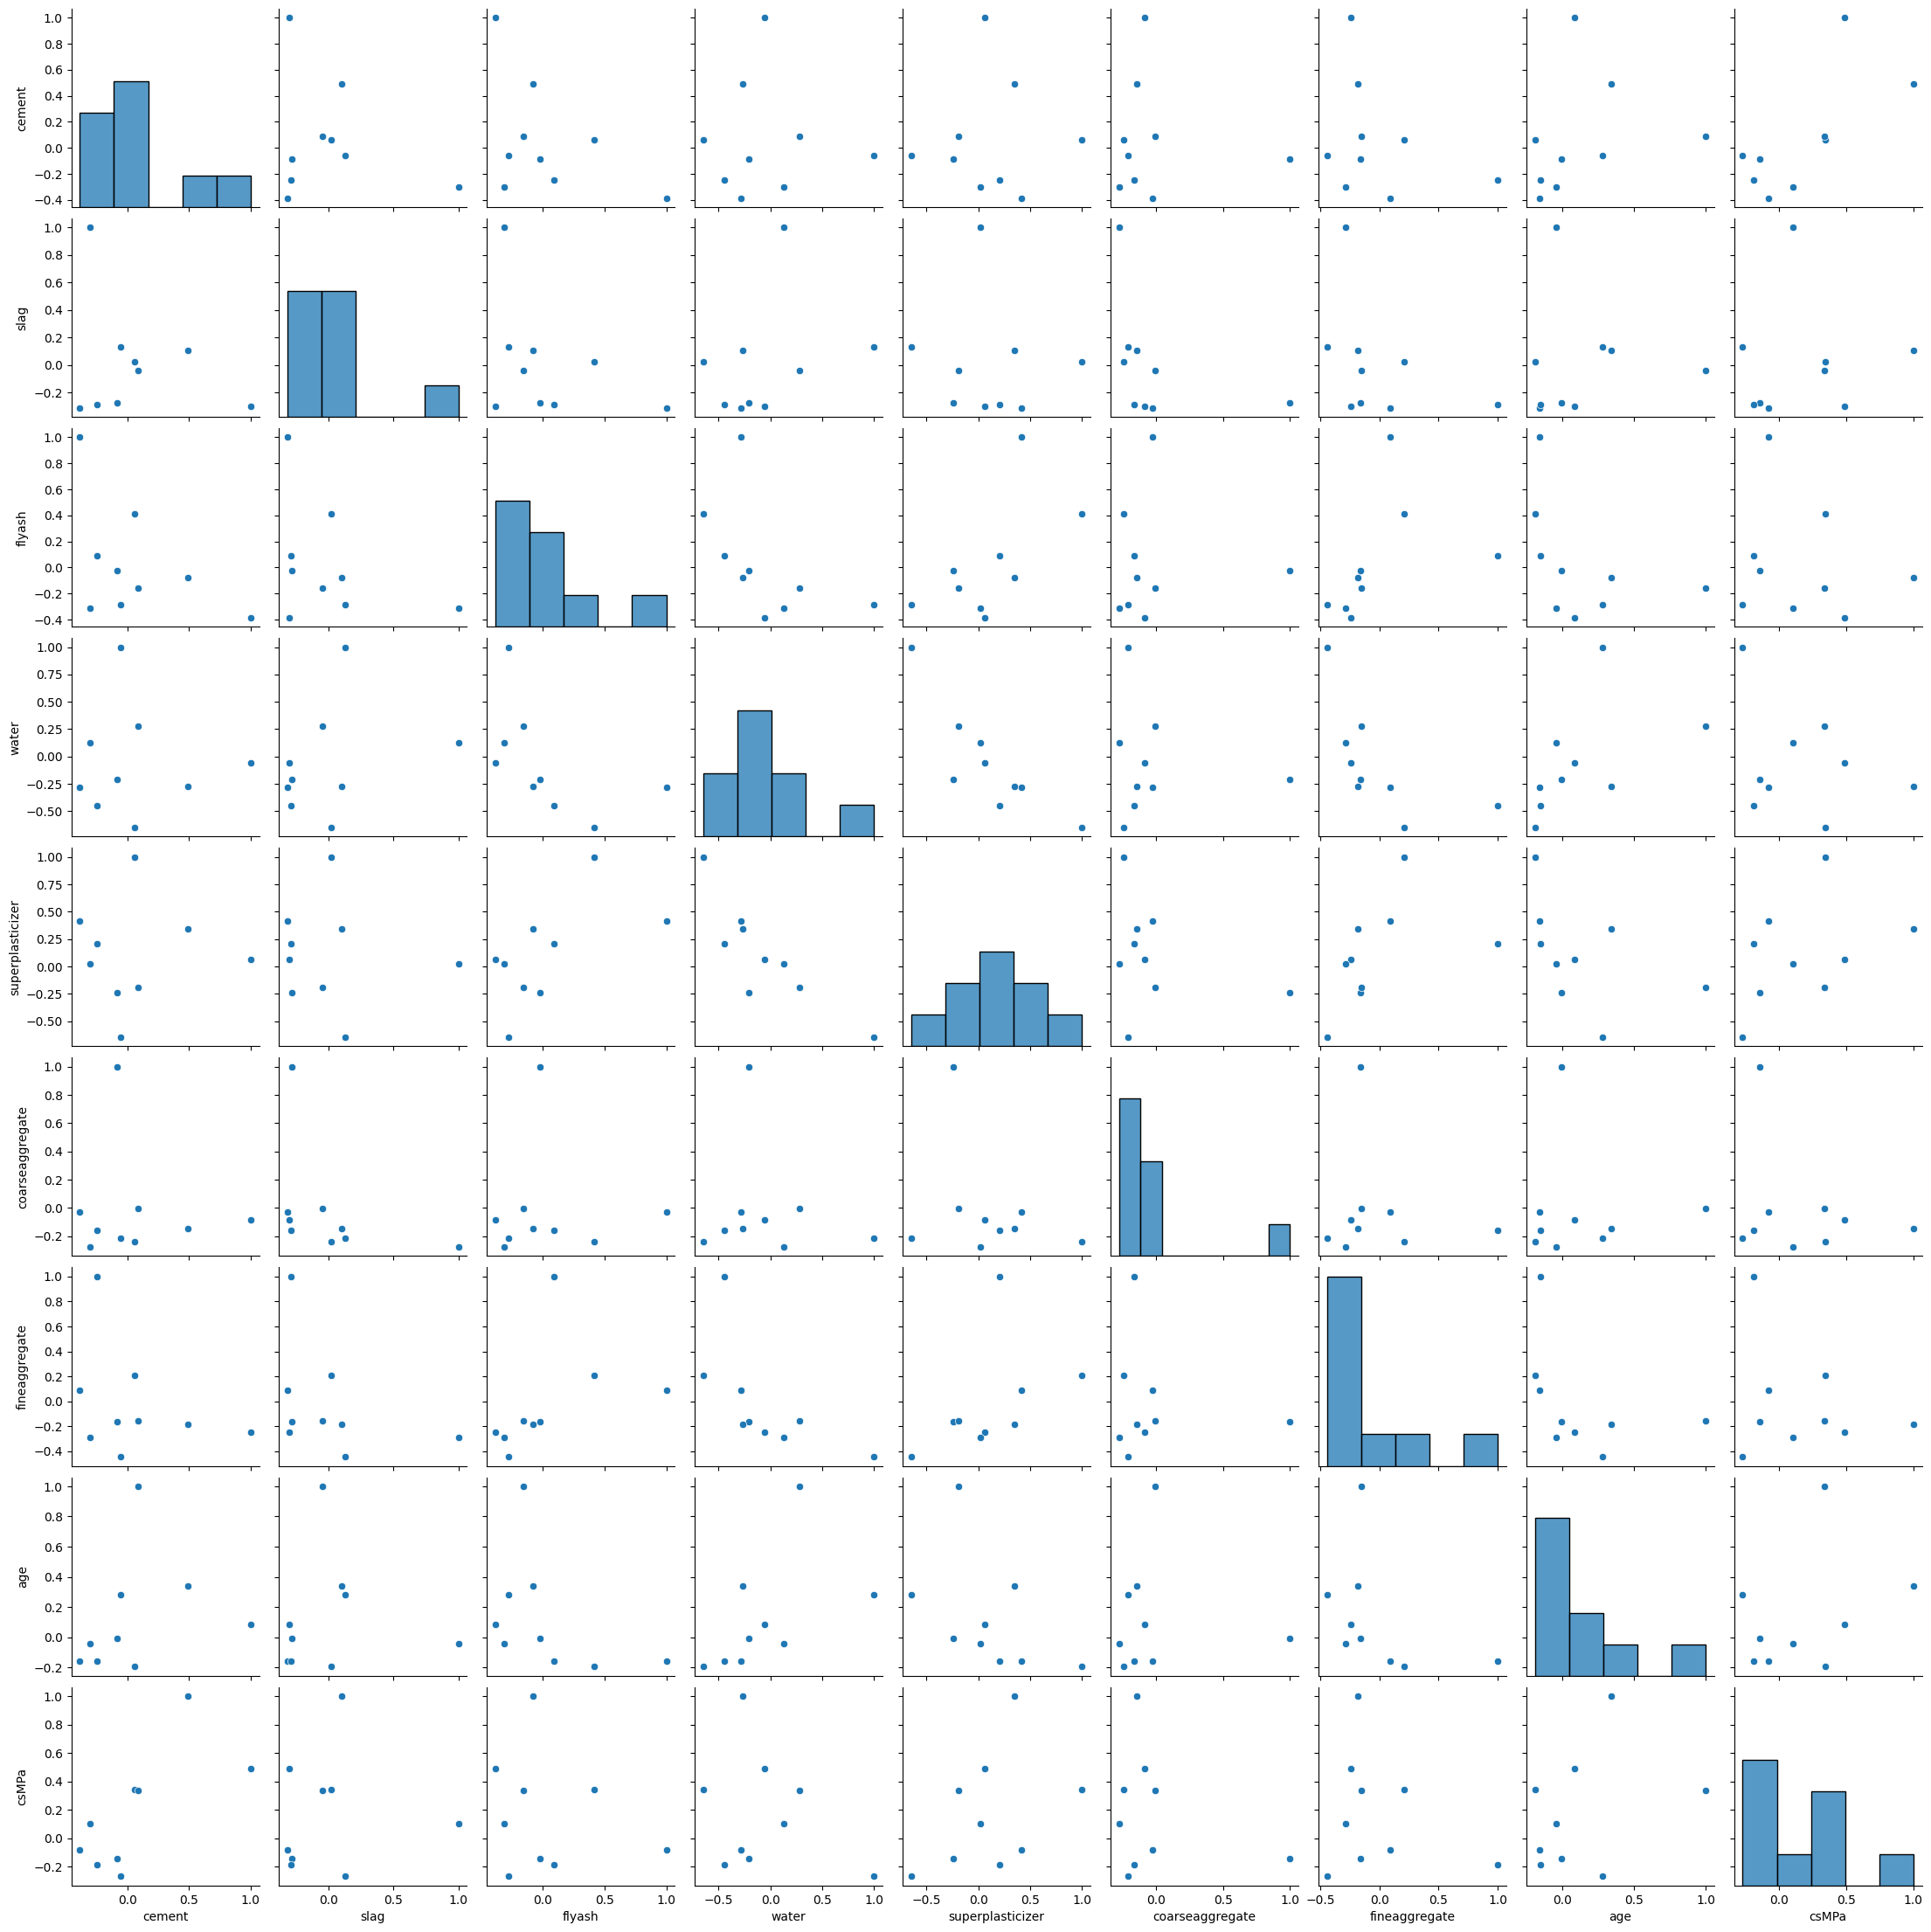

In [8]:
# Creating pairplot
sb.pairplot(matrix)

## After observing these graphs we came to the conclusion that the age of concrete is most corralated with csMPa

In [9]:
# Seperating dataframe
x = data.drop(columns = 'csMPa')
y = data[['csMPa']]

In [10]:
# Scaling features with MinMaxScaler
scaler = mms()
x_scaled = (scaler.fit_transform(x))

c:\Users\Santi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Santi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Santi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Santi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

In [11]:
# Train test split 90% 10%
x_train, x_test, y_train, y_test = tts(x_scaled, y, test_size = 0.1
                                       , random_state = 42)

In [23]:
# Turning the train test into tensor variables
x_train = tf.Variable(x_train, dtype=tf.float32)
x_test = tf.Variable(x_test, dtype=tf.float32)
y_train = tf.Variable(y_train, dtype=tf.float32)
y_test = tf.Variable(y_test, dtype=tf.float32)

In [24]:
# Creating Weights and bias
Num_features = len(x.columns)
Num_units = len(y.columns)

# Setting the learning rate
learning_rate = 0.01

# Matrix for weight and bias
w = tf.Variable(tf.zeros([Num_features, Num_units]), dtype=tf.float32)
b = tf.Variable(tf.zeros([Num_units]), dtype=tf.float32)

In [14]:
# Creating regression
def predict(x):
  z = tf.add(tf.matmul(x, w), b)
  return z

In [15]:
# Making the loss function using lambda
loss = lambda: abs(y_train - predict(x_train))

In [16]:
# creating optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [17]:
# Training model with 1000 epochs
def train(_):
  for i in range(_):
    optimizer.minimize(loss, [w,b])
train(1000)

In [18]:
# Wrtiting a function to predict the strength of each row
def rmse(strength):

  rms = mean_squared_error(y_test, strength, squared=False)

  return rms

In [19]:
# Print the RSME

print(w, b)
strength = predict(x_test)

rmse = rmse(strength)

print('\nThe RMSE is', str(rmse))

<tf.Variable 'Variable:0' shape=(8, 1) dtype=float32, numpy=
array([[ 51.076874 ],
       [ 34.072536 ],
       [ 16.40348  ],
       [-22.93174  ],
       [  7.212176 ],
       [  2.0897734],
       [  5.880561 ],
       [ 60.732723 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.8499494], dtype=float32)>

The RMSE is 11.5758505


In [20]:
# Creating predictions
prediction = predict(x_test)

In [21]:
# calculate the percentage of deviations
deviations = abs(y_test - predict(x_test))

In [22]:
# Calculating percentage of deviations
counter = 0
for i in range(len(deviations)):

  if rmse < deviations[i]:
    counter+=1

print('The percentage of deviations is', str((counter/len(deviations))))


The percentage of deviations is 0.2871287128712871


### The model works reletivly well, but we believe that the model overfitted the training data to a degree. We would tell the structural engineer that the model is +-11.57 on csMPa they ask us to predict